#Imports


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.columns

Index(['Building_ID', 'Building_Type', 'Consumption_Energy_Usage',
       'Consumption_Energy_Ur_Consumption', 'Occupants', 'Floor_Area',
       'Energy_Efficiency_Rating'],
      dtype='object')

In [ ]:
energy_by_type = train.groupby('Building_Type')['Consumption_Energy_Usage'].mean()
print(energy_by_type)

Building_Type
Commercial     281.120608
Industrial     276.751321
Residential    273.165178
Name: Consumption_Energy_Usage, dtype: float64


                                   Building_ID  Building_Type  \
Building_ID                           1.000000      -0.040800   
Building_Type                        -0.040800       1.000000   
Consumption_Energy_Usage              0.024071      -0.025088   
Consumption_Energy_Ur_Consumption     0.044121       0.031080   
Occupants                             0.023366      -0.035910   
Floor_Area                            0.022788       0.029723   
Energy_Efficiency_Rating              0.007325       0.019358   
Log_Energy_Usage                      0.012226      -0.021632   
Square_Floor_Area                     0.024492       0.029384   

                                   Consumption_Energy_Usage  \
Building_ID                                        0.024071   
Building_Type                                     -0.025088   
Consumption_Energy_Usage                           1.000000   
Consumption_Energy_Ur_Consumption                 -0.090006   
Occupants                         

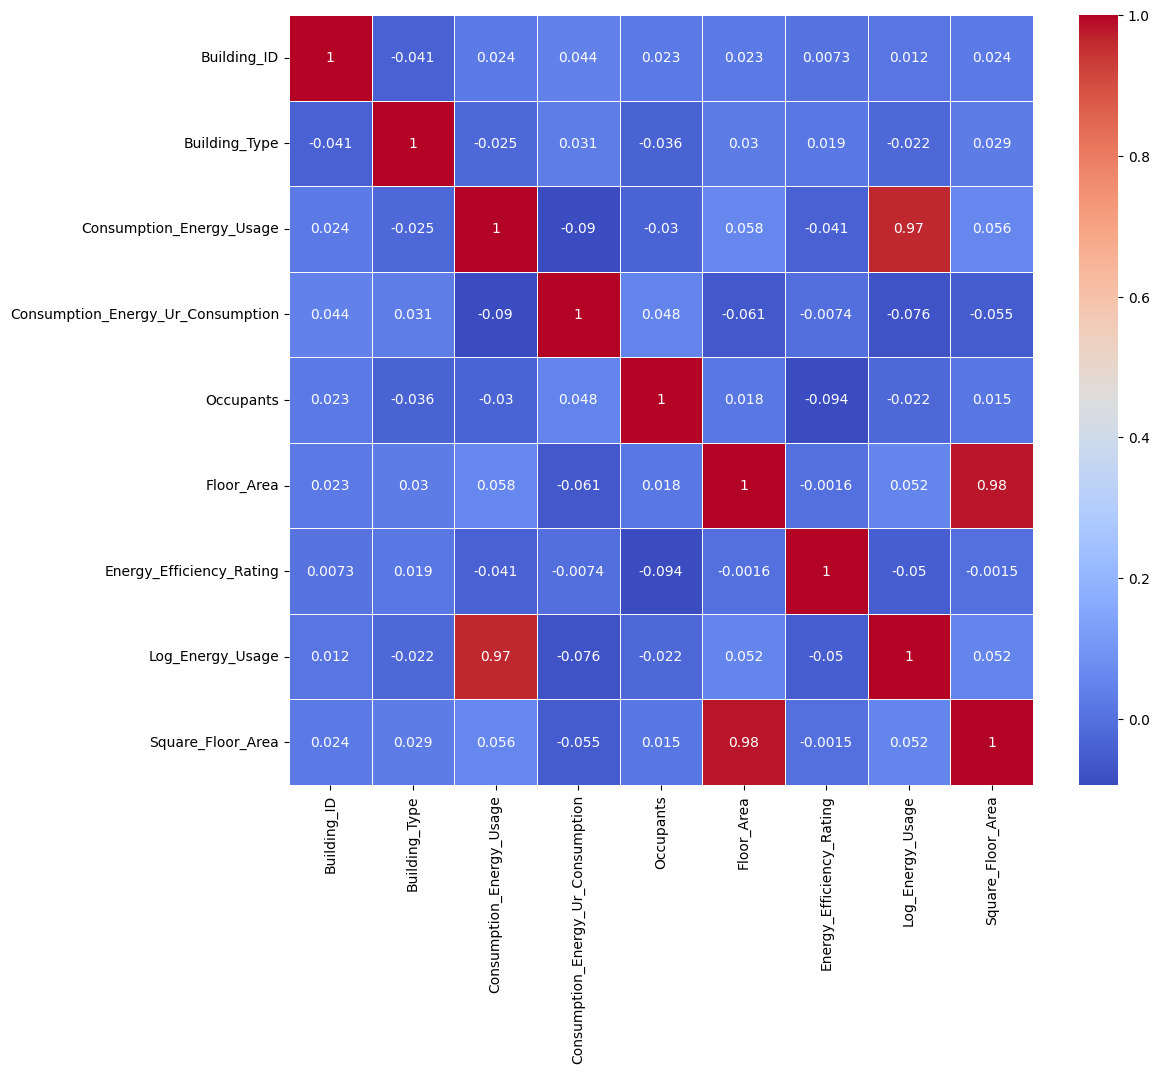

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
data = pd.read_csv("train.csv")

label_encoder = LabelEncoder()
label_encoder_buildings = LabelEncoder()
data['Building_Type'] = label_encoder.fit_transform(data['Building_Type'])
data['Energy_Efficiency_Rating'] = label_encoder.fit_transform(data['Energy_Efficiency_Rating'])
data['Building_ID'] = label_encoder_buildings.fit_transform(data['Building_ID'])
data['Log_Energy_Usage'] = np.log1p(data['Consumption_Energy_Usage'])
data['Square_Floor_Area'] = data['Floor_Area'] ** 2

numerical_columns = [
    'Consumption_Energy_Usage',
    'Consumption_Energy_Ur_Consumption',
    'Occupants',
    'Floor_Area'
]
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

correlation_matrix = data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
train['Energy_per_Occupant'] = train['Consumption_Energy_Usage'] / train['Occupants']
train['Energy_per_Floor_Area'] = train['Consumption_Energy_Usage'] / train['Floor_Area']
energy_per_occupant = train.groupby('Building_Type')['Energy_per_Occupant'].mean()
energy_per_area = train.groupby('Building_Type')['Energy_per_Floor_Area'].mean()
print(energy_per_occupant, energy_per_area)

Building_Type
Commercial     6.248613
Industrial     6.429341
Residential    7.803707
Name: Energy_per_Occupant, dtype: float64 Building_Type
Commercial     0.150551
Industrial     0.138084
Residential    0.137370
Name: Energy_per_Floor_Area, dtype: float64


In [ ]:
from scipy.stats import zscore
train['Energy_Zscore'] = zscore(train['Consumption_Energy_Usage'])
outliers = train[train['Energy_Zscore'] > 3]
print(outliers)

Empty DataFrame
Columns: [Building_ID, Building_Type, Consumption_Energy_Usage, Consumption_Energy_Ur_Consumption, Occupants, Floor_Area, Energy_Efficiency_Rating, Energy_per_Occupant, Energy_per_Floor_Area, Energy_Zscore]
Index: []
